In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import cv2 as cv
import os
rootdir = '2020.11.02 Futószalagos gyártás'

for it in os.scandir(rootdir):
    if it.is_dir():
        df=pd.DataFrame(columns =['name', 'type','number of granule','color density average Red','color density average Green','color density average Blue','average area of granule','average perimeter of granule','highest area of granule','lowest area of granule','highest perimeter of granule','lowest perimeter of granule'])
        for images in os.listdir(it.path):
            if (images.endswith(".jpg")):
                im = cv.imread(it.path +"/"+images)
                img_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
                ret, img_gray1 = cv.threshold(img_gray, 80, 200, cv.THRESH_BINARY)
                contours, hierarchy = cv.findContours(img_gray1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
                number=0
                perimeterlist = []
                arealist = []
                colorlist = []
                for cnt in contours:
                    perimeter = cv.arcLength(cnt,True)
                    area = cv.contourArea(cnt)
                    if (perimeter!=0)or(area!=0):
                        perimeterlist.append(perimeter)
                        arealist.append(area)
                        number=number+1
                        mask = np.zeros(im.shape[:2], dtype="uint8")
                        cv.drawContours(mask, [cnt], -1, 255, -1)
                        mask = cv.erode(mask, None, iterations=2)
                        mean = cv.mean(im, mask=mask)[:3]
                        if 0 < mean[0]:
                            colorlist.append(mean)
                perimeterlist.sort()
                arealist.sort()
                if (len(colorlist)==0):
                    Output2=nan
                else:
                    Output = [[],[],[]]
                    for i in range(len(colorlist)):
                        for j in range(len(colorlist[i])):
                            Output[j].append(colorlist[i][j])
                    Output2 = []
                    x=round(np.mean(Output[0]),1)
                    y=round(np.mean(Output[1]),1)
                    z=round(np.mean(Output[2]),1)
                cv2.imwrite(it.nameimages, img)

                if (len(arealist)==0):
                    a=pd.Series({"name":images, 'type':it.name,'number of granule':number,'color density average Red':nan,'color density average Green':nan,'color density average Blue':nan,'average area of granule':nan,'average perimeter of granule':nan,'highest area of granule':nan,'lowest area of granule':nan,'highest perimeter of granule':nan,'lowest perimeter of granule':nan})
                else:
                    a=pd.Series({"name":images, 'type':it.name,'number of granule':number,'color density average Red':z,'color density average Green':y,'color density average Blue':x,'average area of granule':round(sum(arealist) / len(arealist),2),'average perimeter of granule':round(sum(perimeterlist) / len(perimeterlist),2),'highest area of granule':round(arealist[-1]),'lowest area of granule':round(arealist[0]),'highest perimeter of granule':round(perimeterlist[-1]),'lowest perimeter of granule':round(perimeterlist[0])})
                df=pd.concat([df, a.to_frame().T], ignore_index=True)
        df.to_excel(it.name+".xlsx")


**analysis**  <br>
gyartas file


In [2]:

import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("Gyártás.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,gy1513.jpg,Gyártás,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gy1961.jpg,Gyártás,5,122.1,121.7,58.3,229.70,60.36,804.0,10.0,149.0,12.0
2,gy4998.jpg,Gyártás,62,114.0,113.6,78.3,216.30,48.52,4657.0,0.0,366.0,2.0
3,gy267.jpg,Gyártás,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gy3246.jpg,Gyártás,26,110.6,110.2,73.4,73.40,34.62,272.0,0.0,108.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6002,gy478.jpg,Gyártás,3,113.4,121.7,75.9,11.17,12.24,17.0,0.0,17.0,3.0
6003,gy5212.jpg,Gyártás,14,110.1,108.1,81.1,34.82,18.99,265.0,0.0,68.0,2.0
6004,gy82.jpg,Gyártás,11,112.7,110.5,67.8,70.59,31.91,168.0,6.0,55.0,10.0
6005,gy4452.jpg,Gyártás,11,111.5,111.1,79.6,30.82,20.23,120.0,0.0,48.0,2.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                 21.382529
color density average Red          5.931736
color density average Green        5.663830
color density average Blue         7.138044
average area of granule          223.402908
average perimeter of granule      23.641153
highest area of granule         2314.913613
lowest area of granule            65.698302
highest perimeter of granule     146.249029
lowest perimeter of granule       13.139736
dtype: float64

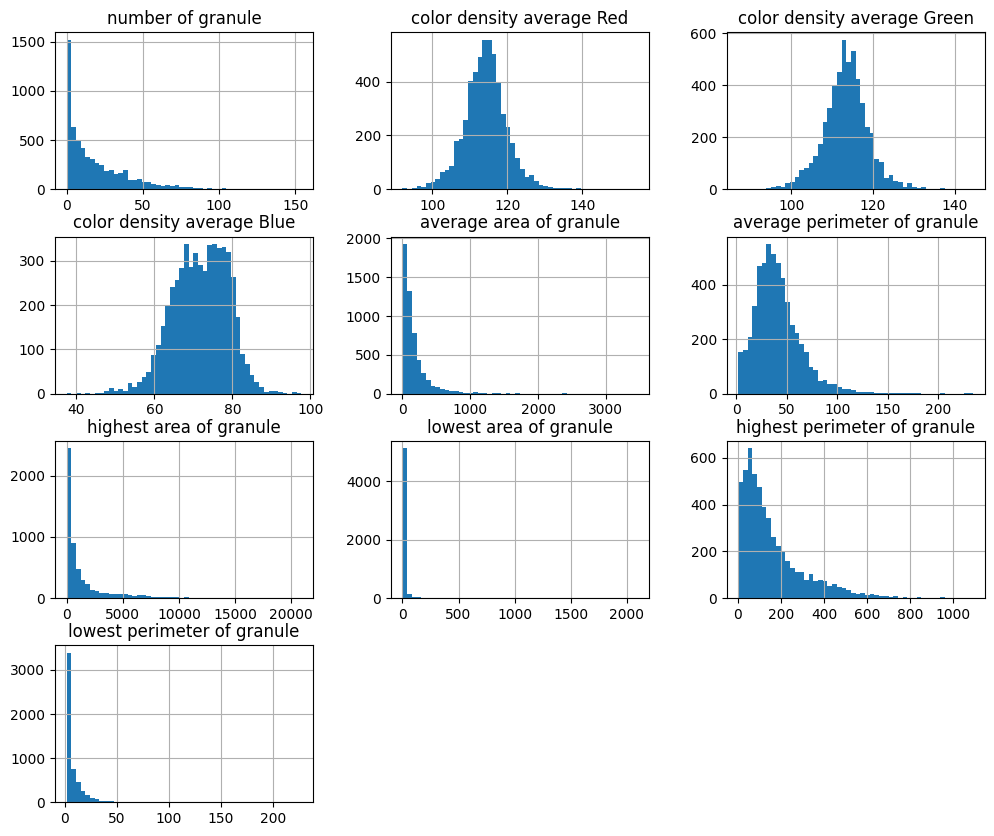

In [3]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


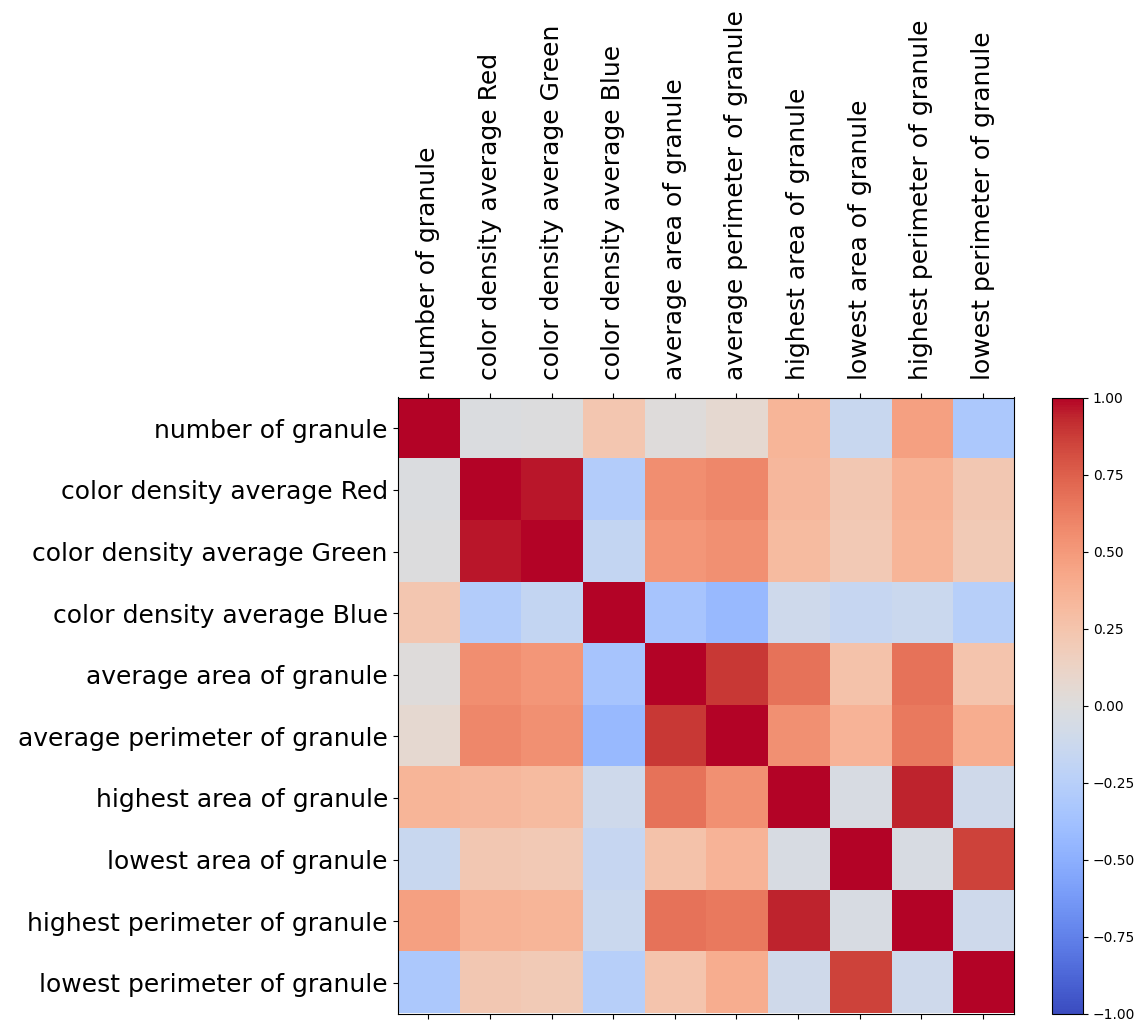

In [4]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

**analysis**  <br>
5.7 rpm vissza file

In [5]:
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("5,7 rpm vissza.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,e2128.jpg,"5,7 rpm vissza",60,113.5,113.4,78.4,103.53,39.80,497.0,1.0,111.0,4.0
1,e775.jpg,"5,7 rpm vissza",28,110.2,109.0,75.0,57.73,29.19,202.0,0.0,64.0,2.0
2,e314.jpg,"5,7 rpm vissza",52,112.4,112.4,83.4,64.23,28.19,761.0,0.0,127.0,2.0
3,e2549.jpg,"5,7 rpm vissza",63,107.8,107.8,74.1,88.76,34.39,1391.0,0.0,260.0,2.0
4,e2598.jpg,"5,7 rpm vissza",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,e3177.jpg,"5,7 rpm vissza",17,113.7,110.9,77.6,77.29,32.43,297.0,0.0,90.0,2.0
3189,e2737.jpg,"5,7 rpm vissza",13,107.9,108.1,75.8,63.54,28.53,338.0,1.0,82.0,4.0
3190,e2090.jpg,"5,7 rpm vissza",107,114.2,112.5,75.3,233.57,51.94,4554.0,0.0,534.0,2.0
3191,e1622.jpg,"5,7 rpm vissza",37,114.9,114.2,78.8,258.86,59.34,2162.0,14.0,328.0,16.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                 29.385386
color density average Red          5.548383
color density average Green        5.303036
color density average Blue         5.068843
average area of granule          260.844205
average perimeter of granule      21.966441
highest area of granule         2346.980481
lowest area of granule           215.064941
highest perimeter of granule     148.970871
lowest perimeter of granule       13.861594
dtype: float64

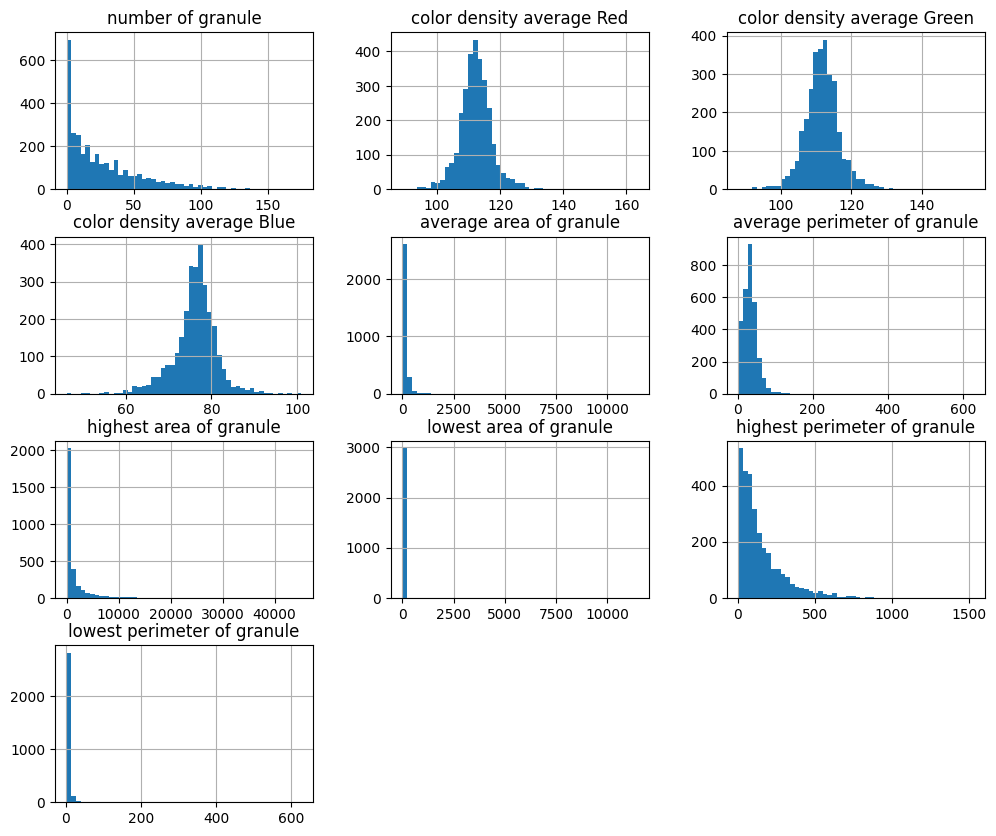

In [6]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


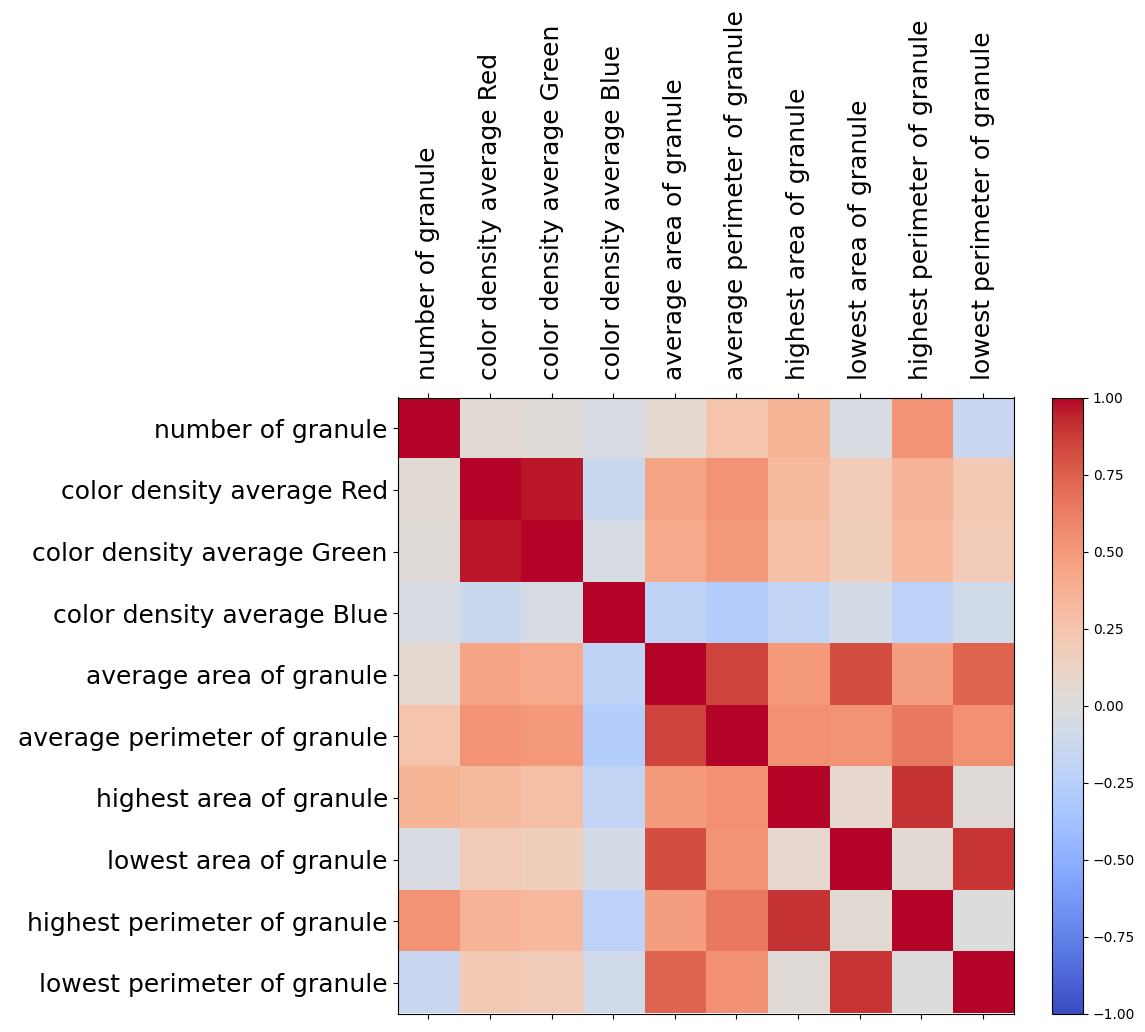

In [7]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

**analysis**  <br>
5.7 rpm file

In [8]:
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("5,7 rpm.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,a2044.jpg,"5,7 rpm",45,109.0,108.7,86.3,52.84,27.64,377.0,0.0,90.0,2.0
1,a1151.jpg,"5,7 rpm",3,95.5,96.0,86.0,22.17,20.40,59.0,2.0,43.0,6.0
2,a2382.jpg,"5,7 rpm",127,110.8,109.8,84.7,101.58,36.73,1582.0,0.0,173.0,2.0
3,a2425.jpg,"5,7 rpm",1,110.8,109.8,84.7,9.00,11.66,9.0,9.0,12.0,12.0
4,a1297.jpg,"5,7 rpm",14,109.6,110.6,87.2,35.68,20.94,170.0,0.0,56.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2791,a142.jpg,"5,7 rpm",103,110.7,109.9,82.9,78.95,31.99,1027.0,0.0,171.0,2.0
2792,a26.jpg,"5,7 rpm",86,112.4,111.7,83.8,140.50,46.73,1360.0,0.0,207.0,2.0
2793,a284.jpg,"5,7 rpm",41,112.3,112.3,86.2,84.46,33.41,432.0,0.0,136.0,2.0
2794,a523.jpg,"5,7 rpm",37,108.6,109.3,86.2,51.80,26.50,313.0,0.0,118.0,2.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                37.217161
color density average Red         3.590248
color density average Green       3.523345
color density average Blue        3.648131
average area of granule          59.279165
average perimeter of granule     11.931096
highest area of granule         805.239228
lowest area of granule           13.588679
highest perimeter of granule     97.023209
lowest perimeter of granule       4.485701
dtype: float64

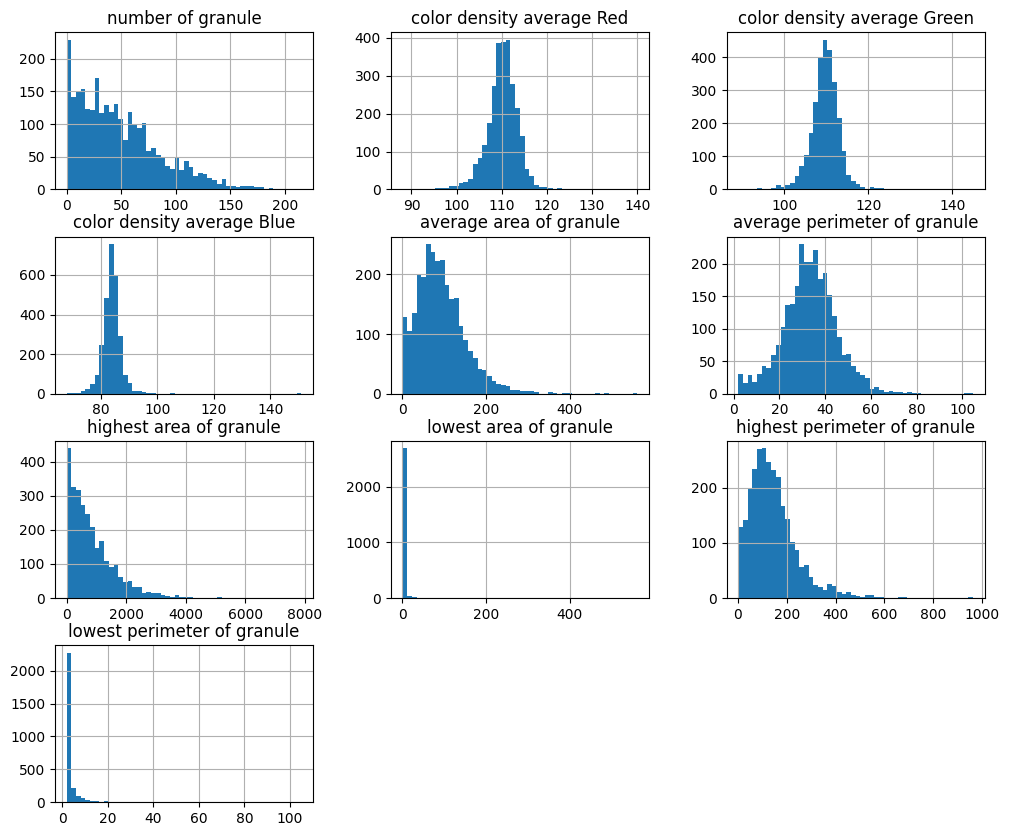

In [9]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


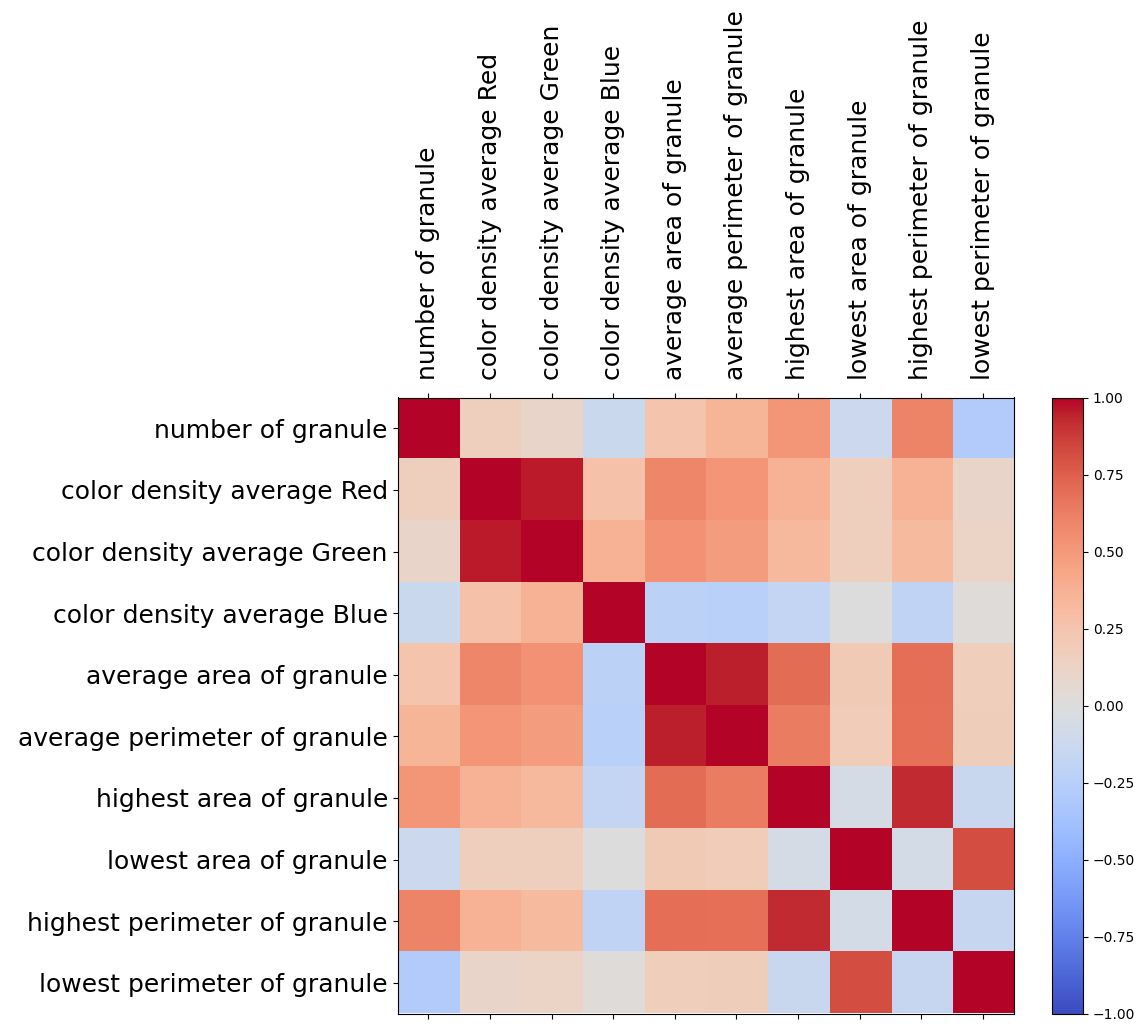

In [10]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

**analysis**  <br>
6.1 rpm vissza file

In [11]:
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("6,1 rpm vissza.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,d2848.jpg,"6,1 rpm vissza",21,112.5,111.4,76.0,67.55,30.87,327.0,2.0,81.0,5.0
1,d1288.jpg,"6,1 rpm vissza",12,109.4,108.2,79.9,39.96,23.63,142.0,2.0,54.0,6.0
2,d848.jpg,"6,1 rpm vissza",29,114.5,114.0,81.3,86.17,34.07,523.0,4.0,106.0,8.0
3,d1638.jpg,"6,1 rpm vissza",35,116.1,115.8,77.9,201.09,54.99,2349.0,1.0,332.0,4.0
4,d899.jpg,"6,1 rpm vissza",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2871,d1330.jpg,"6,1 rpm vissza",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2872,d644.jpg,"6,1 rpm vissza",1,118.9,117.8,75.8,7.50,11.41,8.0,8.0,11.0,11.0
2873,d1497.jpg,"6,1 rpm vissza",56,113.1,111.1,75.4,243.66,52.48,5324.0,0.0,524.0,4.0
2874,d2225.jpg,"6,1 rpm vissza",51,115.5,113.9,77.0,135.85,45.77,1364.0,0.0,242.0,4.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                 16.860824
color density average Red          6.001189
color density average Green        5.710686
color density average Blue         4.189016
average area of granule          250.795494
average perimeter of granule      23.735865
highest area of granule         2733.296323
lowest area of granule            34.528514
highest perimeter of granule     159.270847
lowest perimeter of granule        9.555614
dtype: float64

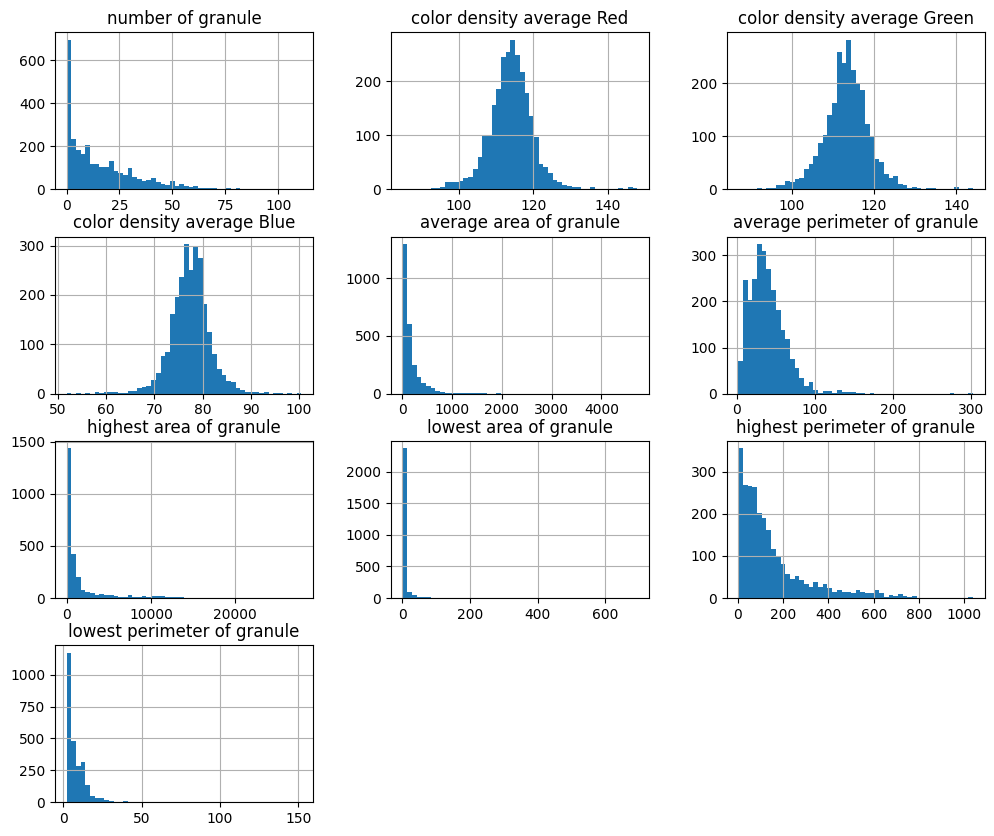

In [12]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


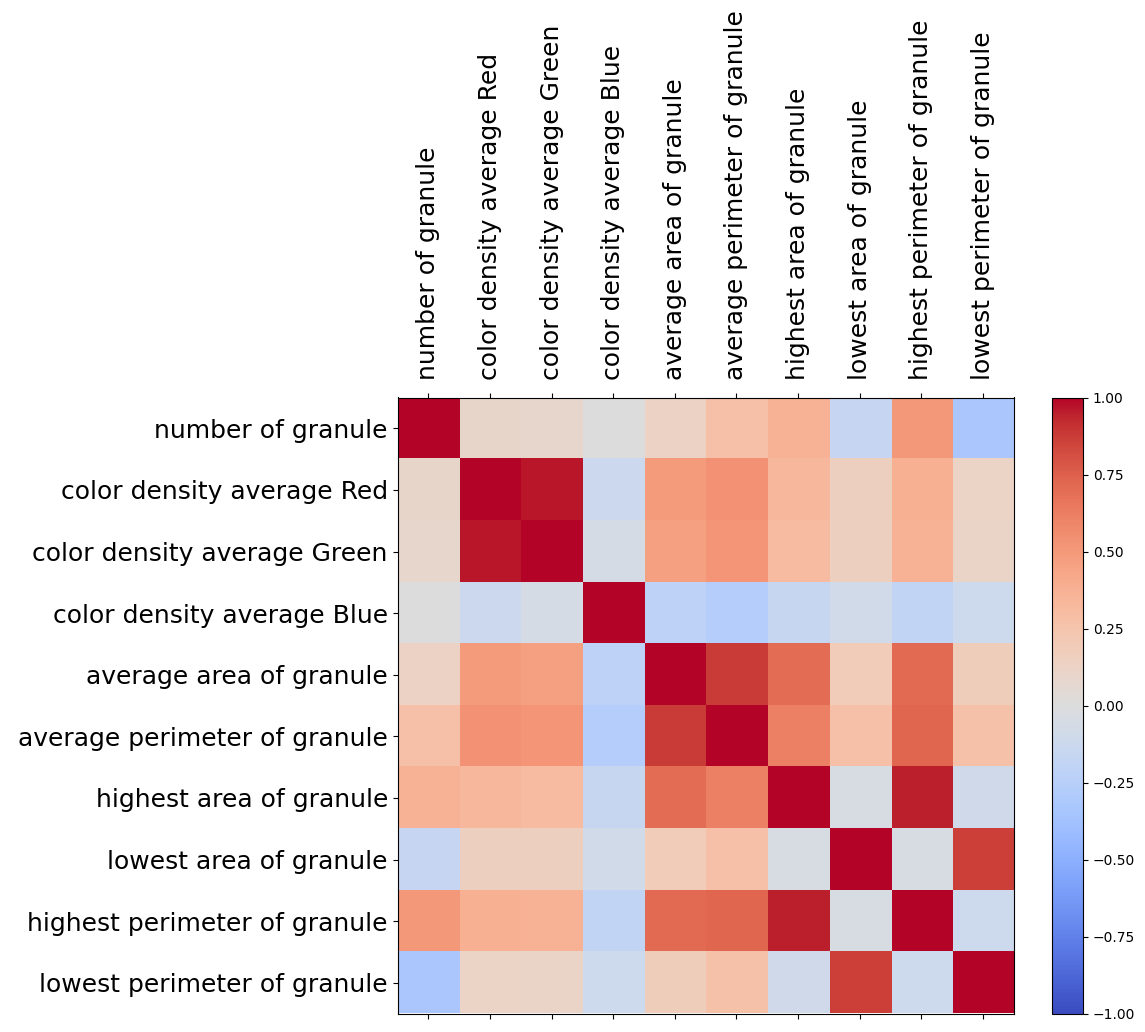

In [13]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

**analysis**  <br>
6.1 rpm file

In [14]:
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("6,1 rpm.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,b1351.jpg,"6,1 rpm",1,112.8,114.0,87.8,18.00,18.49,18.0,18.0,18.0,18.0
1,b1884.jpg,"6,1 rpm",118,112.6,111.0,68.5,201.39,55.35,1921.0,0.0,339.0,2.0
2,b491.jpg,"6,1 rpm",39,108.4,107.2,73.8,72.22,33.87,236.0,0.0,81.0,2.0
3,b336.jpg,"6,1 rpm",49,111.5,109.7,70.3,170.52,56.14,1080.0,5.0,265.0,9.0
4,b2244.jpg,"6,1 rpm",39,108.9,107.2,71.0,86.71,37.37,324.0,0.0,87.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2903,b1659.jpg,"6,1 rpm",81,114.6,112.7,71.0,149.40,45.86,1638.0,0.0,198.0,2.0
2904,b1688.jpg,"6,1 rpm",2,112.7,102.9,68.8,45.25,26.61,72.0,18.0,36.0,17.0
2905,b148.jpg,"6,1 rpm",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2906,b2829.jpg,"6,1 rpm",2,111.4,113.2,69.4,38.75,22.19,73.0,4.0,35.0,9.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                29.005378
color density average Red         4.152687
color density average Green       3.954757
color density average Blue        4.094428
average area of granule          75.066719
average perimeter of granule     14.356076
highest area of granule         692.824122
lowest area of granule           27.402067
highest perimeter of granule     89.083712
lowest perimeter of granule       8.171957
dtype: float64

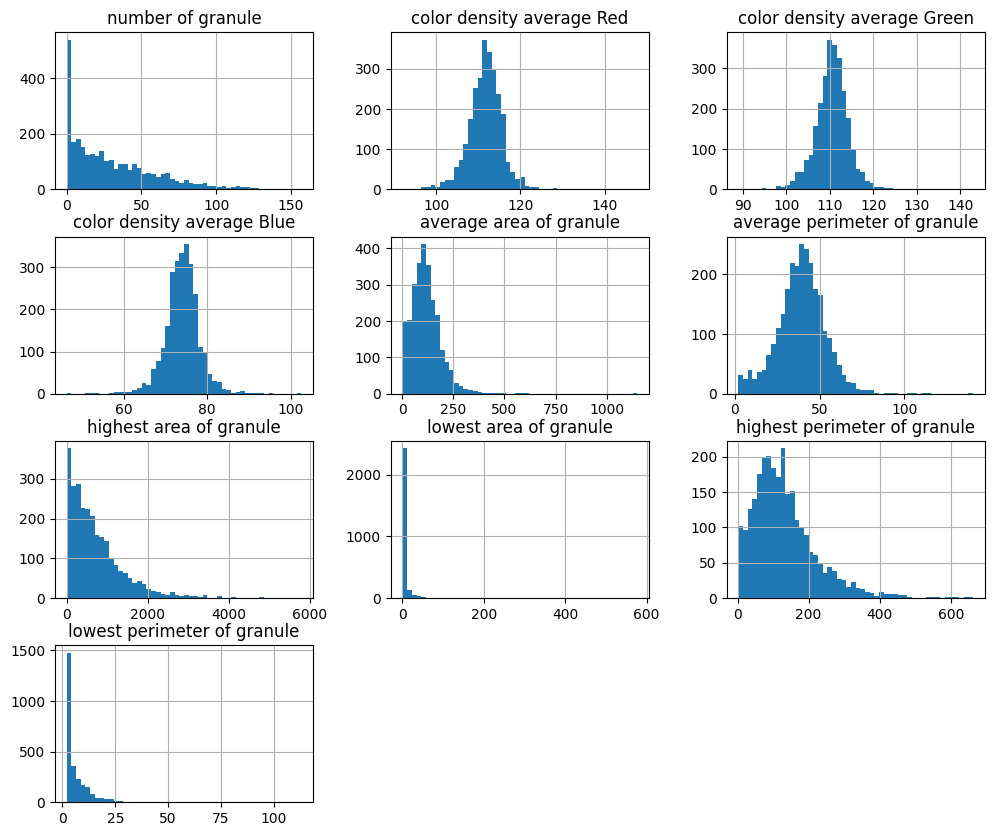

In [15]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


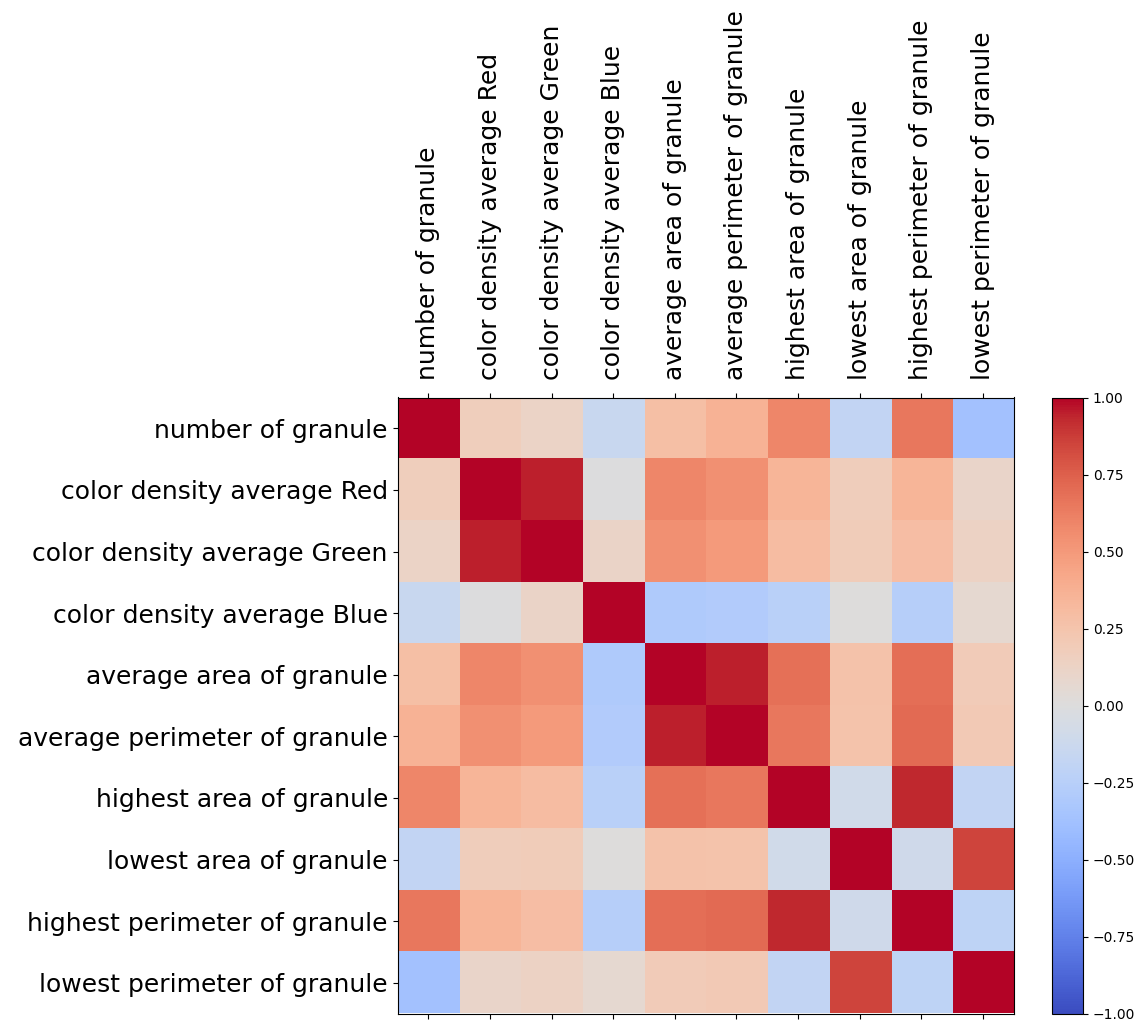

In [16]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

**analysis**  <br>
6.5 rpm file

In [17]:
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_excel("6,5 rpm.xlsx", index_col=0)
df

,name,type,number of granule,color density average Red,color density average Green,color density average Blue,average area of granule,average perimeter of granule,highest area of granule,lowest area of granule,highest perimeter of granule,lowest perimeter of granule
0,c1564.jpg,"6,5 rpm",15,113.8,112.8,59.7,216.70,58.84,1282.0,4.0,196.0,8.0
1,c1916.jpg,"6,5 rpm",9,112.1,109.4,62.6,167.17,44.73,998.0,0.0,140.0,3.0
2,c899.jpg,"6,5 rpm",6,113.8,113.1,62.5,189.17,60.56,463.0,40.0,128.0,26.0
3,c2803.jpg,"6,5 rpm",19,122.4,119.6,63.8,477.16,83.10,3946.0,0.0,412.0,3.0
4,c2471.jpg,"6,5 rpm",1,122.4,119.6,63.8,6.00,9.66,6.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3006,c2179.jpg,"6,5 rpm",10,115.5,112.5,71.2,187.05,53.90,1255.0,15.0,241.0,18.0
3007,c695.jpg,"6,5 rpm",13,120.1,118.2,67.3,329.23,73.25,1150.0,0.0,167.0,3.0
3008,c132.jpg,"6,5 rpm",42,115.2,114.6,69.4,121.40,43.62,598.0,3.0,104.0,8.0
3009,c921.jpg,"6,5 rpm",42,117.9,115.8,64.3,200.94,55.32,1218.0,0.0,186.0,2.0


/tmp/ipykernel_221092/888443328.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


number of granule                 13.851089
color density average Red          6.650296
color density average Green        6.141818
color density average Blue         5.339987
average area of granule          300.991893
average perimeter of granule      31.070073
highest area of granule         1891.543086
lowest area of granule           160.977133
highest perimeter of granule     133.054943
lowest perimeter of granule       21.313711
dtype: float64

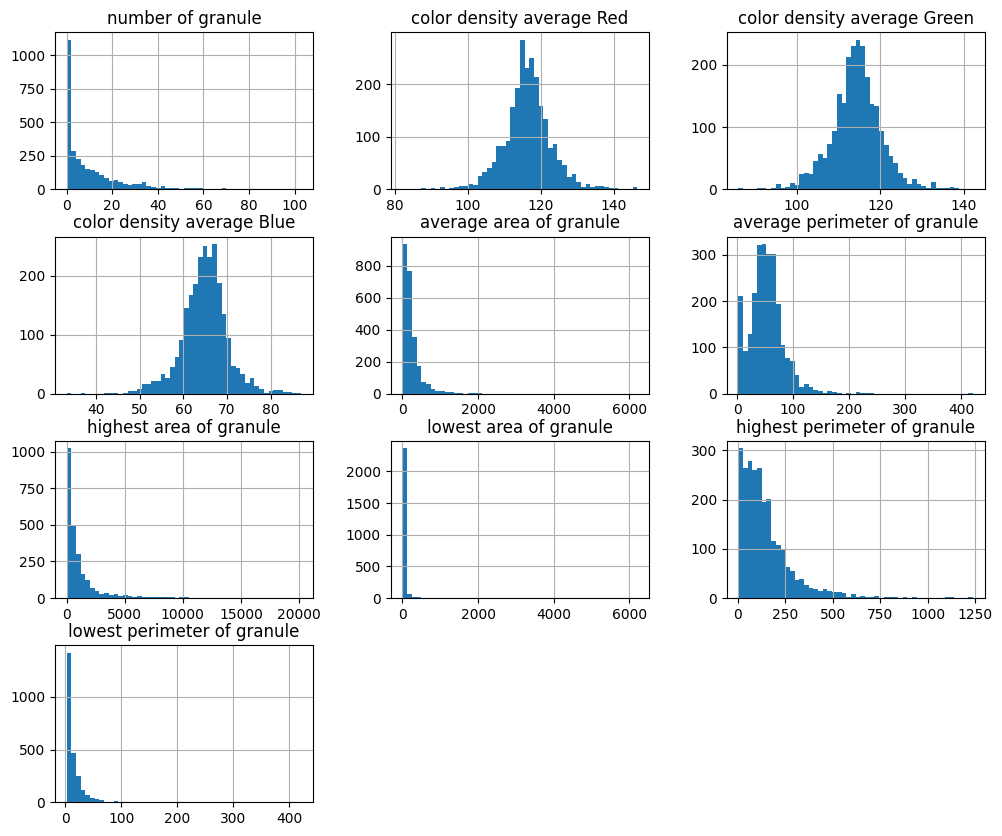

In [18]:
#showing data partition and standard deviation
df.hist(bins=50, figsize=(12,10))
df.std()  

/tmp/ipykernel_221092/77369321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alpha = x.corr().columns
/tmp/ipykernel_221092/77369321.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)


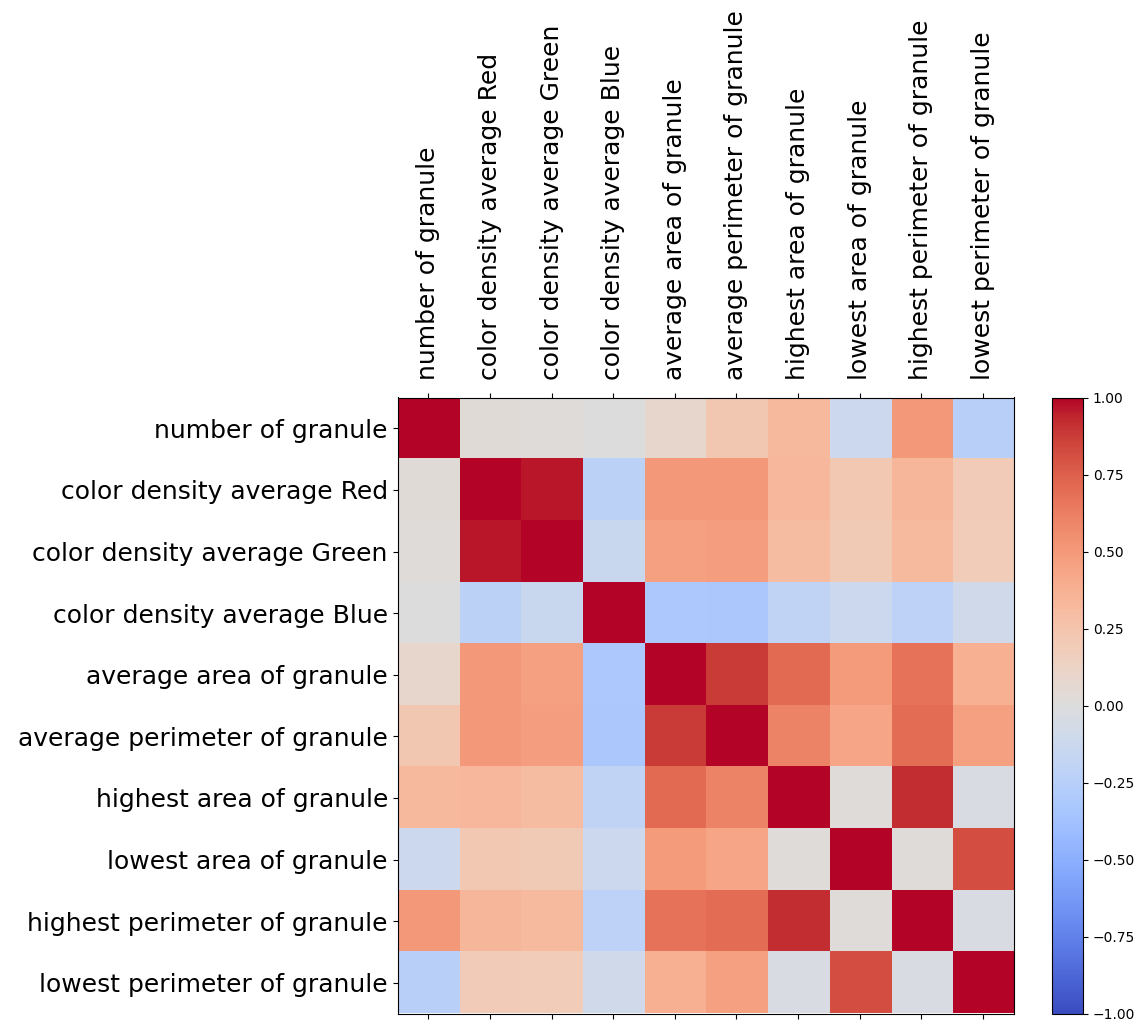

In [19]:
#heat graph based on correlation
x = df
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)